<a href="https://colab.research.google.com/github/kahramankaya/VeriBilimiKucukProje/blob/main/(Bist%20Korelasyon%20Matrisi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#(Bist Korelasyon Matrisi)

In [65]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/kahraman.txt")
veri=data+"."+"IS"
veri.columns=["bıst30"]
print(veri)

      bıst30
0   AEFES.IS
1   AKBNK.IS
2    AKSA.IS
3   ARCLK.IS
4   ASELS.IS
5   BIMAS.IS
6   BJKAS.IS
7   CCOLA.IS
8   DOHOL.IS
9   EREGL.IS
10  FROTO.IS
11  GARAN.IS
12  GOODY.IS
13  HALKB.IS
14  ISCTR.IS
15  KCHOL.IS
16  KORDS.IS
17  KOZAL.IS
18  PETKM.IS
19  SAHOL.IS
20   SISE.IS
21  TAVHL.IS
22  TCELL.IS
23  THYAO.IS
24  TKFEN.IS
25  TOASO.IS
26   TSKB.IS
27  TUPRS.IS
28  VAKBN.IS
29  YKBNK.IS


In [129]:
!pip install yfinance
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
#yfinance bir hısse okuma kutuphanesıdır.ıstedıgımız hıssenın verısını burdan alabılıyoruz.
import yfinance as yf
#yfinance dataframe okuma yetenegı yok. bu yuzden lısteye cevırdık kı okuyabılsın.
hısseler=veri["bıst30"].values.tolist()
print(hısseler)

#tickers kısmına spesıfık bır hısse adı da yazılabılır suan yaptıgım gıbı bır toplulukta atılabılır.
veri1=yf.download(tickers=hısseler,start="2023-02-01",end="2023-03-17")
print(veri1)


['AEFES.IS', 'AKBNK.IS', 'AKSA.IS', 'ARCLK.IS', 'ASELS.IS', 'BIMAS.IS', 'BJKAS.IS', 'CCOLA.IS', 'DOHOL.IS', 'EREGL.IS', 'FROTO.IS', 'GARAN.IS', 'GOODY.IS', 'HALKB.IS', 'ISCTR.IS', 'KCHOL.IS', 'KORDS.IS', 'KOZAL.IS', 'PETKM.IS', 'SAHOL.IS', 'SISE.IS', 'TAVHL.IS', 'TCELL.IS', 'THYAO.IS', 'TKFEN.IS', 'TOASO.IS', 'TSKB.IS', 'TUPRS.IS', 'VAKBN.IS', 'YKBNK.IS']
[*********************100%***********************]  30 of 30 completed
            Adj Close                                               \
             AEFES.IS   AKBNK.IS    AKSA.IS    ARCLK.IS   ASELS.IS   
Date                                                                 
2023-01-31  52.200001  16.980000  77.400002  107.199997  56.799999   
2023-02-01  49.459999  15.550000  75.300003  101.300003  53.049999   
2023-02-02  48.880001  15.060000  75.000000  104.400002  53.450001   
2023-02-03  51.150002  16.510000  77.750000  108.599998  57.450001   
2023-02-06  50.000000  16.200001  75.099998  105.000000  58.799999   
2023-02-07 

In [87]:
#eksık degerlerı bulma:
print(veri1.isnull().sum())

Adj Close  AEFES.IS    1
           AKBNK.IS    1
           AKSA.IS     1
           ARCLK.IS    3
           ASELS.IS    1
                      ..
Volume     TOASO.IS    1
           TSKB.IS     3
           TUPRS.IS    1
           VAKBN.IS    1
           YKBNK.IS    1
Length: 180, dtype: int64
Adj Close  AEFES.IS    1
           AKBNK.IS    1
           AKSA.IS     1
           ARCLK.IS    3
           ASELS.IS    1
                      ..
Volume     TOASO.IS    1
           TSKB.IS     3
           TUPRS.IS    1
           VAKBN.IS    1
           YKBNK.IS    1
Length: 180, dtype: int64


In [92]:
#eksık verı sılme:
veri2=veri1.dropna()
print(veri2)

            Adj Close                                               \
             AEFES.IS   AKBNK.IS    AKSA.IS    ARCLK.IS   ASELS.IS   
Date                                                                 
2023-01-31  52.200001  16.980000  77.400002  107.199997  56.799999   
2023-02-01  49.459999  15.550000  75.300003  101.300003  53.049999   
2023-02-02  48.880001  15.060000  75.000000  104.400002  53.450001   
2023-02-03  51.150002  16.510000  77.750000  108.599998  57.450001   
2023-02-06  50.000000  16.200001  75.099998  105.000000  58.799999   
2023-02-07  46.680000  14.700000  69.150002   94.849998  52.950001   
2023-02-08  44.900002  13.700000  65.400002   87.849998  47.700001   
2023-02-09  44.900002  13.700000  65.400002   87.849998  47.700001   
2023-02-15  51.299999  16.170000  76.050003  104.300003  58.200001   
2023-02-16  49.220001  16.100000  74.000000  107.000000  56.950001   
2023-02-17  49.840000  15.990000  73.000000  103.599998  55.900002   
2023-02-20  49.74000

In [91]:
fıyat=veri2["Adj Close"]
fıyat.reset_index()

,Date,AEFES.IS,AKBNK.IS,AKSA.IS,ARCLK.IS,ASELS.IS,BIMAS.IS,BJKAS.IS,CCOLA.IS,DOHOL.IS,...,SISE.IS,TAVHL.IS,TCELL.IS,THYAO.IS,TKFEN.IS,TOASO.IS,TSKB.IS,TUPRS.IS,VAKBN.IS,YKBNK.IS
0,2023-01-31,52.200001,16.980000,77.400002,107.199997,56.799999,124.500000,7.94,183.199997,8.81,...,39.540001,82.650002,36.299999,137.600006,38.939999,158.100006,4.18,549.370667,9.45,9.08
1,2023-02-01,49.459999,15.550000,75.300003,101.300003,53.049999,119.099998,7.35,179.600006,8.26,...,38.299999,77.000000,34.799999,130.800003,35.060001,145.600006,3.87,522.710266,8.71,8.40
2,2023-02-02,48.880001,15.060000,75.000000,104.400002,53.450001,121.599998,6.86,180.300003,8.23,...,39.880001,77.500000,34.820000,134.600006,32.900002,150.699997,3.76,512.492004,8.49,8.24
3,2023-02-03,51.150002,16.510000,77.750000,108.599998,57.450001,127.000000,7.08,189.000000,8.71,...,43.040001,80.050003,36.900002,142.699997,34.520000,155.000000,4.03,556.430542,9.10,9.02
4,2023-02-06,50.000000,16.200001,75.099998,105.000000,58.799999,128.500000,6.62,185.100006,8.44,...,42.639999,77.949997,37.099998,139.899994,35.500000,157.000000,4.05,537.759033,8.80,8.88
5,2023-02-07,46.680000,14.700000,69.150002,94.849998,52.950001,120.000000,6.00,173.500000,7.77,...,38.820000,70.199997,33.400002,127.199997,31.959999,141.300003,3.65,485.552979,8.02,8.13
6,2023-02-08,44.900002,13.700000,65.400002,87.849998,47.700001,117.300003,5.70,160.600006,7.02,...,36.520000,64.650002,31.000000,115.000000,29.520000,128.399994,3.36,452.854553,7.48,7.75
7,2023-02-09,44.900002,13.700000,65.400002,87.849998,47.700001,117.300003,5.70,160.600006,7.02,...,36.520000,64.650002,31.000000,115.000000,29.520000,128.399994,3.36,452.854553,7.48,7.75
8,2023-02-15,51.299999,16.170000,76.050003,104.300003,58.200001,132.000000,6.60,190.800003,8.54,...,42.700001,77.199997,36.740002,139.899994,35.139999,155.399994,4.01,534.043274,8.82,8.94
9,2023-02-16,49.220001,16.100000,74.000000,107.000000,56.950001,134.100006,6.89,184.500000,8.28,...,45.259998,72.250000,35.299999,140.000000,34.099998,160.000000,3.97,585.598999,9.20,9.12


In [102]:
#getiri hesaplama:matematıksel formulu: bugunku kapanısın bır oncekı gunun kapanıs fıyatına(Adj Close)  bolumunden 1 cıkarılmasıdır. pythonda kısa fonksıyonu pct_change() dır.
#fınansta bızım ıcın onemlı olan fıyat degıl getırıdır. bız getırı uzerınden korelasyon yapacagız. 
veri3=veri2["Adj Close"].pct_change()
getiri=veri3.dropna()
print(getiri)

            AEFES.IS  AKBNK.IS   AKSA.IS  ARCLK.IS  ASELS.IS  BIMAS.IS  \
Date                                                                     
2023-02-01 -0.052490 -0.084217 -0.027132 -0.055037 -0.066021 -0.043374   
2023-02-02 -0.011727 -0.031511 -0.003984  0.030602  0.007540  0.020991   
2023-02-03  0.046440  0.096282  0.036667  0.040230  0.074836  0.044408   
2023-02-06 -0.022483 -0.018776 -0.034084 -0.033149  0.023499  0.011811   
2023-02-07 -0.066400 -0.092593 -0.079228 -0.096667 -0.099490 -0.066148   
2023-02-08 -0.038132 -0.068027 -0.054230 -0.073801 -0.099150 -0.022500   
2023-02-09  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2023-02-15  0.142539  0.180292  0.162844  0.187251  0.220126  0.125320   
2023-02-16 -0.040546 -0.004329 -0.026956  0.025887 -0.021478  0.015909   
2023-02-17  0.012596 -0.006832 -0.013514 -0.031776 -0.018437  0.008949   
2023-02-20 -0.002006  0.000000  0.075342  0.064672 -0.020572 -0.005174   
2023-02-21  0.030358 -0.005629 -0.0280

In [122]:
#std degerı bızım ıcın volalıte hakkında bılgı verır. gunde hangısı en yuksek oynaklıga sahıpse ondan kacarız mesela tabii benım gıbı yatırımcı isen :)
sp=getiri.std()
#std degerlerını kucukten buyuge sıraladık.
standart_sapma=sp.sort_values(ascending=True)
print(standart_sapma)

BIMAS.IS    0.034855
AEFES.IS    0.042698
SAHOL.IS    0.043692
CCOLA.IS    0.044405
FROTO.IS    0.045751
KCHOL.IS    0.046600
GOODY.IS    0.047866
BJKAS.IS    0.048610
SISE.IS     0.049034
EREGL.IS    0.049571
HALKB.IS    0.049893
AKSA.IS     0.050110
TCELL.IS    0.050803
TUPRS.IS    0.051050
KOZAL.IS    0.051371
YKBNK.IS    0.051515
KORDS.IS    0.051838
GARAN.IS    0.052577
VAKBN.IS    0.052769
TAVHL.IS    0.052775
ISCTR.IS    0.052990
ARCLK.IS    0.053377
PETKM.IS    0.053930
THYAO.IS    0.053952
AKBNK.IS    0.054776
TSKB.IS     0.055478
ASELS.IS    0.055814
TOASO.IS    0.056223
TKFEN.IS    0.056521
DOHOL.IS    0.059801
dtype: float64


          AEFES.IS  AKBNK.IS   AKSA.IS  ARCLK.IS  ASELS.IS  BIMAS.IS  \
AEFES.IS  1.000000  0.824247  0.589449  0.742602  0.788161  0.719860   
AKBNK.IS  0.824247  1.000000  0.689165  0.782414  0.872575  0.780881   
AKSA.IS   0.589449  0.689165  1.000000  0.668890  0.685312  0.519645   
ARCLK.IS  0.742602  0.782414  0.668890  1.000000  0.806082  0.753988   
ASELS.IS  0.788161  0.872575  0.685312  0.806082  1.000000  0.813296   
BIMAS.IS  0.719860  0.780881  0.519645  0.753988  0.813296  1.000000   
BJKAS.IS  0.641458  0.737443  0.480512  0.715749  0.717197  0.676783   
CCOLA.IS  0.808462  0.766713  0.637711  0.782261  0.882569  0.800871   
DOHOL.IS  0.834073  0.794249  0.634170  0.801220  0.791856  0.759825   
EREGL.IS  0.501645  0.570305  0.571572  0.747394  0.665757  0.672825   
FROTO.IS  0.629578  0.824562  0.640679  0.800061  0.851114  0.878674   
GARAN.IS  0.778779  0.962090  0.620554  0.774701  0.813502  0.723334   
GOODY.IS  0.825731  0.744984  0.747841  0.789279  0.806957  0.74

<Axes: title={'center': 'bıst30 korelasyon'}>

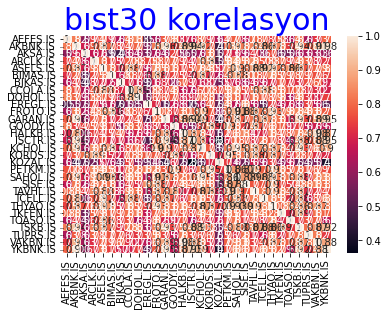

In [145]:
import matplotlib.pyplot as plt
korelasyon=getiri.corr()
print(korelasyon)
plt.title("bıst30 korelasyon",fontsize=30,color="blue")
#eger su parametreler(xticklabels=True,yticklabels=True) eklenmez ıse bazıları tek yazılır. bu yuzden bunlar eklenır bıst 30 hepsı heatmap'e yansır.
sns.heatmap(korelasyon,annot=True,xticklabels=True,yticklabels=True)

In [153]:
#h0=ılıskı yok
anlamlılık=pg.pairwise_corr(getiri)
print(anlamlılık)


            X         Y   method alternative   n         r          CI95%  \
0    AEFES.IS  AKBNK.IS  pearson   two-sided  29  0.824247   [0.66, 0.91]   
1    AEFES.IS   AKSA.IS  pearson   two-sided  29  0.589449   [0.28, 0.79]   
2    AEFES.IS  ARCLK.IS  pearson   two-sided  29  0.742602   [0.52, 0.87]   
3    AEFES.IS  ASELS.IS  pearson   two-sided  29  0.788161    [0.59, 0.9]   
4    AEFES.IS  BIMAS.IS  pearson   two-sided  29  0.719860   [0.48, 0.86]   
5    AEFES.IS  BJKAS.IS  pearson   two-sided  29  0.641458   [0.36, 0.82]   
6    AEFES.IS  CCOLA.IS  pearson   two-sided  29  0.808462   [0.63, 0.91]   
7    AEFES.IS  DOHOL.IS  pearson   two-sided  29  0.834073   [0.67, 0.92]   
8    AEFES.IS  EREGL.IS  pearson   two-sided  29  0.501645   [0.17, 0.73]   
9    AEFES.IS  FROTO.IS  pearson   two-sided  29  0.629578   [0.34, 0.81]   
10   AEFES.IS  GARAN.IS  pearson   two-sided  29  0.778779   [0.58, 0.89]   
11   AEFES.IS  GOODY.IS  pearson   two-sided  29  0.825731   [0.66, 0.92]   

In [155]:
#sımdı tum degerlerı gozle goremıyoruz orada noktalarala boyle devam edıyor yazıyor sadece. hepsını gormek ıcın soyle yaparız:
print(anlam)
pd.set_option("display.max_rows",None)

            X         Y   method alternative   n         r         CI95%  \
0    AEFES.IS  AKBNK.IS  pearson   two-sided  29  0.824247  [0.66, 0.91]   
1    AEFES.IS   AKSA.IS  pearson   two-sided  29  0.589449  [0.28, 0.79]   
2    AEFES.IS  ARCLK.IS  pearson   two-sided  29  0.742602  [0.52, 0.87]   
3    AEFES.IS  ASELS.IS  pearson   two-sided  29  0.788161   [0.59, 0.9]   
4    AEFES.IS  BIMAS.IS  pearson   two-sided  29  0.719860  [0.48, 0.86]   
5    AEFES.IS  BJKAS.IS  pearson   two-sided  29  0.641458  [0.36, 0.82]   
6    AEFES.IS  CCOLA.IS  pearson   two-sided  29  0.808462  [0.63, 0.91]   
7    AEFES.IS  DOHOL.IS  pearson   two-sided  29  0.834073  [0.67, 0.92]   
8    AEFES.IS  EREGL.IS  pearson   two-sided  29  0.501645  [0.17, 0.73]   
9    AEFES.IS  FROTO.IS  pearson   two-sided  29  0.629578  [0.34, 0.81]   
10   AEFES.IS  GARAN.IS  pearson   two-sided  29  0.778779  [0.58, 0.89]   
11   AEFES.IS  GOODY.IS  pearson   two-sided  29  0.825731  [0.66, 0.92]   
12   AEFES.I

In [157]:
anlam=anlamlılık[anlamlılık["p-unc"]>0.05]
print(anlam)
#demek kı 0.05 ten buyuk olan deger yok imiş.

            X         Y   method alternative   n         r          CI95%  \
317  ISCTR.IS  KOZAL.IS  pearson   two-sided  29  0.361822  [-0.01, 0.64]   

       p-unc   BF10     power  
317  0.05377  1.359  0.500388  
